### Implementing SVM

#### Problem Statement
Let's say we have a youtube ad and we want to know whether a person will click on that ad.,
   Features of each ad : relevance_score, ad_length"


In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set()


In [2]:
# Read the data in 
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\NLP code & Data Set\\ad_data.csv")

In [3]:
df.head()

,relevance_score,ad_length,has_clicked
0,1.412816,1.530335,1
1,1.813361,1.631131,1
2,1.432893,4.376792,0
3,1.872718,4.180692,0
4,2.095178,1.079147,1


In [4]:
df.shape

(50, 3)

In [5]:
df.describe()

,relevance_score,ad_length,has_clicked
count,50.000000,50.000000,50.000000
mean,1.500291,2.626178,0.500000
std,0.818878,1.773245,0.505076
min,-0.555524,-0.138106,0.000000
25%,1.018468,1.001077,0.000000
50%,1.539556,2.575253,0.500000
75%,2.096398,4.207599,1.000000
max,3.185158,5.474253,1.000000


In [6]:
dependent_variable = 'has_clicked'

In [7]:
 # Create a list of independent variables
independent_variables = df.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables


['relevance_score', 'ad_length']

In [8]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values


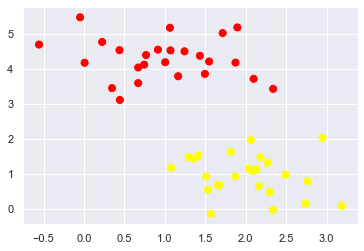

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data,and thereby create a model for classification.
For two dimensional data like that shown here, this is a task we could do by hand.But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes.

We can draw them as follows:

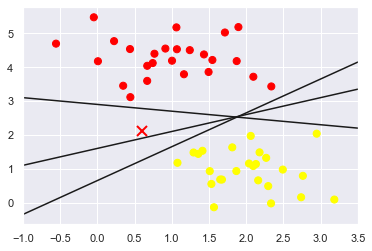

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

    plt.xlim(-1, 3.5);



These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.Depending on which you choose, a new data point (e.g., the one marked by the \"X\" in this plot) will be assigned a different label!Evidently our simple intuition of \"drawing a line between classes\" is not enough, and we need to think a bit deeper.
   


###  Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this.The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.Here is an example of how this might look

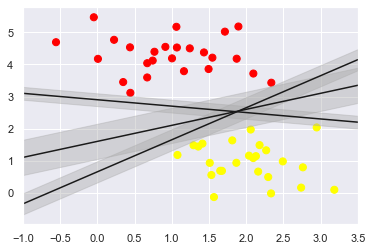

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color= '#AAAAAA', alpha=0.4)
    
    plt.xlim(-1, 3.5);


In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.Support vector machines are an example of such a *maximum margin* estimator.


### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.For the time being, we will use a linear kernel and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily)

In [12]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

# create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

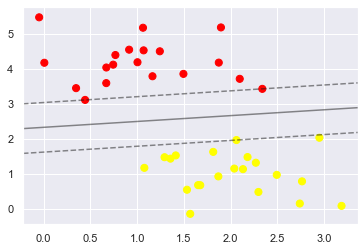

In [15]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(model);


This is the dividing line that maximizes the margin between the two sets of points.Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure.These points are the pivotal elements of this fit, and are known as the *support vectors*, and give the algorithm its name.In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier

In [16]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

### Let's predict on test data set

In [17]:
# Predicting our model on the validation data
y_pred = model.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

1.0

### Actual y values on test data

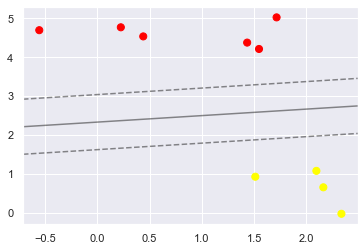

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(model);


### Predicted y values on test data

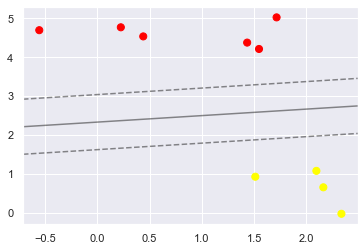

In [20]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='autumn')
plot_svc_decision_function(model);
